## Dynamic bifurcation of consensus

We consider the system:

\begin{align}
\dot{\mathbf{x}} &= -D\mathbf{x} + A\mathbf{S}(\mathbf{x}, u) \\
\dot{u} &= -\varepsilon
\end{align}

where $[\mathbf{S}(\mathbf{x},u)]_i = S(x_i,u)$ and $S(x,u) := x + u + x^2$.

Take $\varepsilon = 10^{-4}$.

In [1]:
%run imports.py
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from matplotlib.colors import Normalize
import pylab

In [2]:
g = get_strongly_connected_digraph(10)
A = nx.adjacency_matrix(g)
D = np.diag(np.asarray(np.sum(nx.adjacency_matrix(g), axis=1)).reshape(-1))

In [3]:
s_xu = lambda x,u: x + u + np.square(x)
phi_xu = lambda x,u: x - s_xu(x,u)

x_range = np.arange(-2.1, 2.1, 0.01)

p1 = np.argmin(s_xu(x_range[0:100], -1))
p2 = 200 + np.argmax(s_xu(x_range[200:], -1))

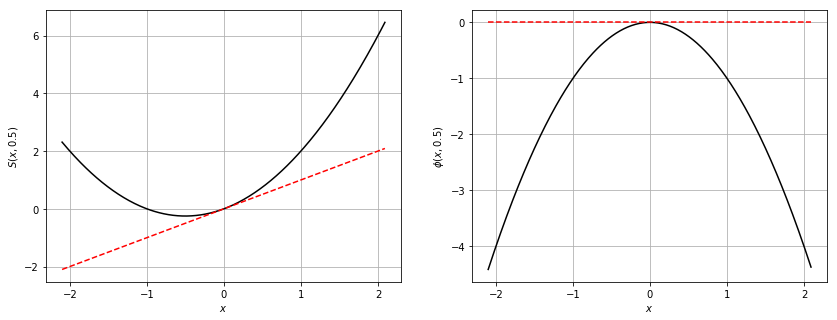

In [4]:
u = 0
plt.figure(figsize=(14,5))

plt.subplot(121)
plt.plot(x_range, s_xu(x_range, u), linestyle='-', color="black")
plt.plot(x_range, x_range, linestyle='--', color='red')
plt.xlabel(r'$x$')
plt.ylabel(r'$S(x,0.5)$')
plt.grid()

plt.subplot(122)
plt.plot(x_range, phi_xu(x_range, u), linestyle='-', color="black")
plt.plot(x_range, np.repeat(0,np.size(x_range)), linestyle='--', color='red')
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi(x,0.5)$')
plt.grid()

Integrate

In [5]:
dt = 0.01
u_range = np.arange(0.7, 1.5, dt)
n_iter = 1000
N = nx.number_of_nodes(g)
x_n = np.zeros((np.size(u_range), N))

u = 0.5

f_t = lambda t,x:np.append(-D.dot(x[:-1]) + A.dot(s_xu(x[:-1],x[-1])), 1e-4)
res = solve_ivp(fun=f_t, t_span=[0,10090], y0=np.append(-2 + np.random.rand(N)/10, -1), method="BDF")

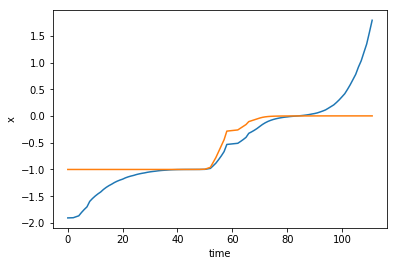

In [6]:
k = np.min(np.where(res.y[0,:] > 2))
plt.plot(res.y[0,0:k])
plt.plot(res.y[N,0:k])
plt.xlabel("time")
plt.ylabel("x")
plt.show()

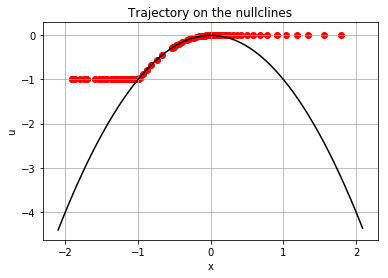

In [7]:
plt.plot(x_range, phi_xu(x_range,0), color='black')
plt.scatter(res.y[0,0:k], res.y[N,0:k], color='red')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Trajectory on the nullclines')
plt.grid()